In [8]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [48]:
data = loadmat('data1.mat')
print(type(data))               # 查看数据格式
X = data['X']
y = data['y']
X,y


<class 'dict'>


(array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
        [1

### 读取数据，将数据按照7:3进行分割

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7, test_size=0.3)
X.shape

(51, 2)

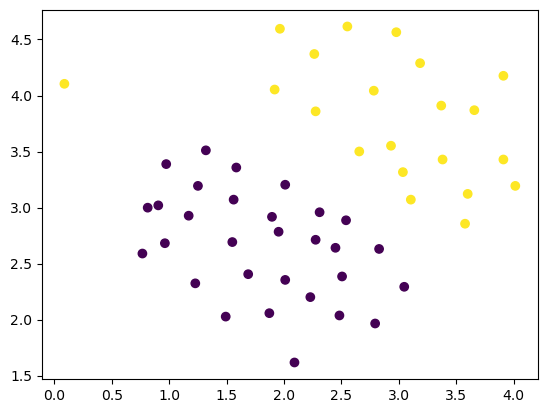

In [60]:
# 将数据进行可视化
plt.scatter(X[:, 0], X[:, 1], c=y.flatten())

In [61]:
y_train.shape, X_train.shape

((35, 1), (35, 2))

### 对训练集的数据进行训练

In [92]:
#调用SVM.linearSVC接口对模型进行训练
model = svm.LinearSVC(C=1,max_iter=10000)
model.fit(X_train, y_train.ravel())

LinearSVC(C=1, max_iter=10000)

### 将训练好的模型用来分别计算训练集和测试集的准确率

In [101]:
print('测试集准确率为：%.2f %%' % (100 * model.score(X_test, y_test)))
print('训练集准确率为：%.2f %%' % (100 * model.score(X_train, y_train)))

测试集准确率为：93.75 %
训练集准确率为：100.00 %


In [102]:
def plot_boundary(model, args):
    xx, yy = np.meshgrid(np.linspace(args[0], args[1], 100), np.linspace(args[2], args[3], 100))
    X = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(X).reshape(xx.shape)
    y_decision = model.decision_function(X).reshape(xx.shape)
    plt.contour(xx,yy,y_pred,cmap=plt.cm.winter)
    plt.contour(xx,yy,y_decision,cmap=plt.cm.winter,alpha=0.2)

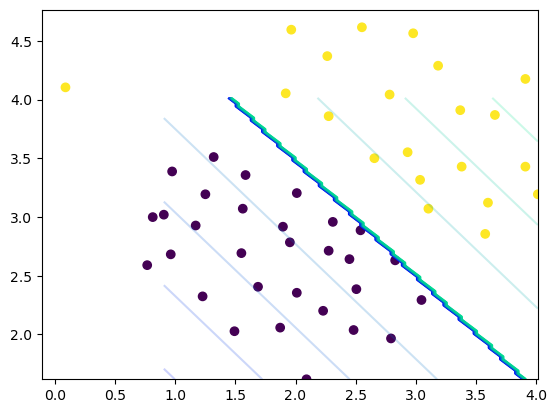

In [103]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plot_boundary(model,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [96]:
# 软惩罚参数C=1的情况
model1 = svm.SVC(kernel='rbf',C=1,gamma=8,max_iter=10000)
model1.fit(X_train, y_train.ravel())

SVC(C=1, gamma=8, max_iter=10000)

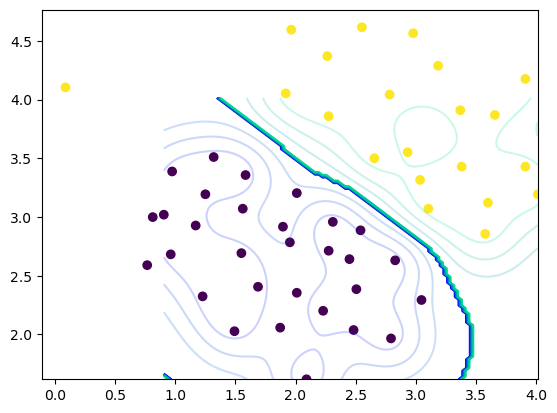

In [97]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plot_boundary(model1,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [98]:
model2 = svm.SVC(kernel='rbf',max_iter=10000)
model2.fit(X_train, y_train.ravel())

SVC(max_iter=10000)

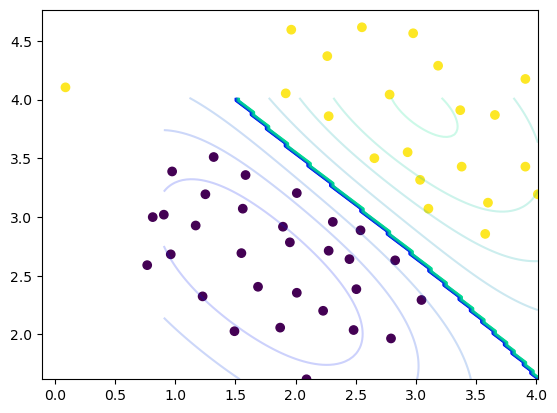

In [99]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plot_boundary(model2,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [100]:
[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()]

[0.9044, 4.015, 1.6177, 4.015]